In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('laptop_price_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,Intel Core i5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,Intel Core i5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,Intel Core i7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,Intel Core i5,0,256,Intel,Mac


In [3]:
# check the shape of the data set
df.shape

(1302, 13)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape

(1302, 12)

# Handeling Null value

In [6]:
df.isnull().sum()

Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

# fetch the duplicate value

In [7]:
df.duplicated().sum()

30

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.shape

(1272, 12)

# check the data type

In [10]:
df.dtypes

Company         object
TypeName        object
Ram              int64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand       object
HDD              int64
SSD              int64
Gpu brand       object
os              object
dtype: object

# seperate the categorical value and numerical value

In [12]:
cat_col=df.select_dtypes(include='object').columns
Num_col=df.select_dtypes(exclude='object').columns
print(cat_col)
print(Num_col)

Index(['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os'], dtype='object')
Index(['Ram', 'Weight', 'Price', 'Touchscreen', 'Ips', 'HDD', 'SSD'], dtype='object')


# apply EDA

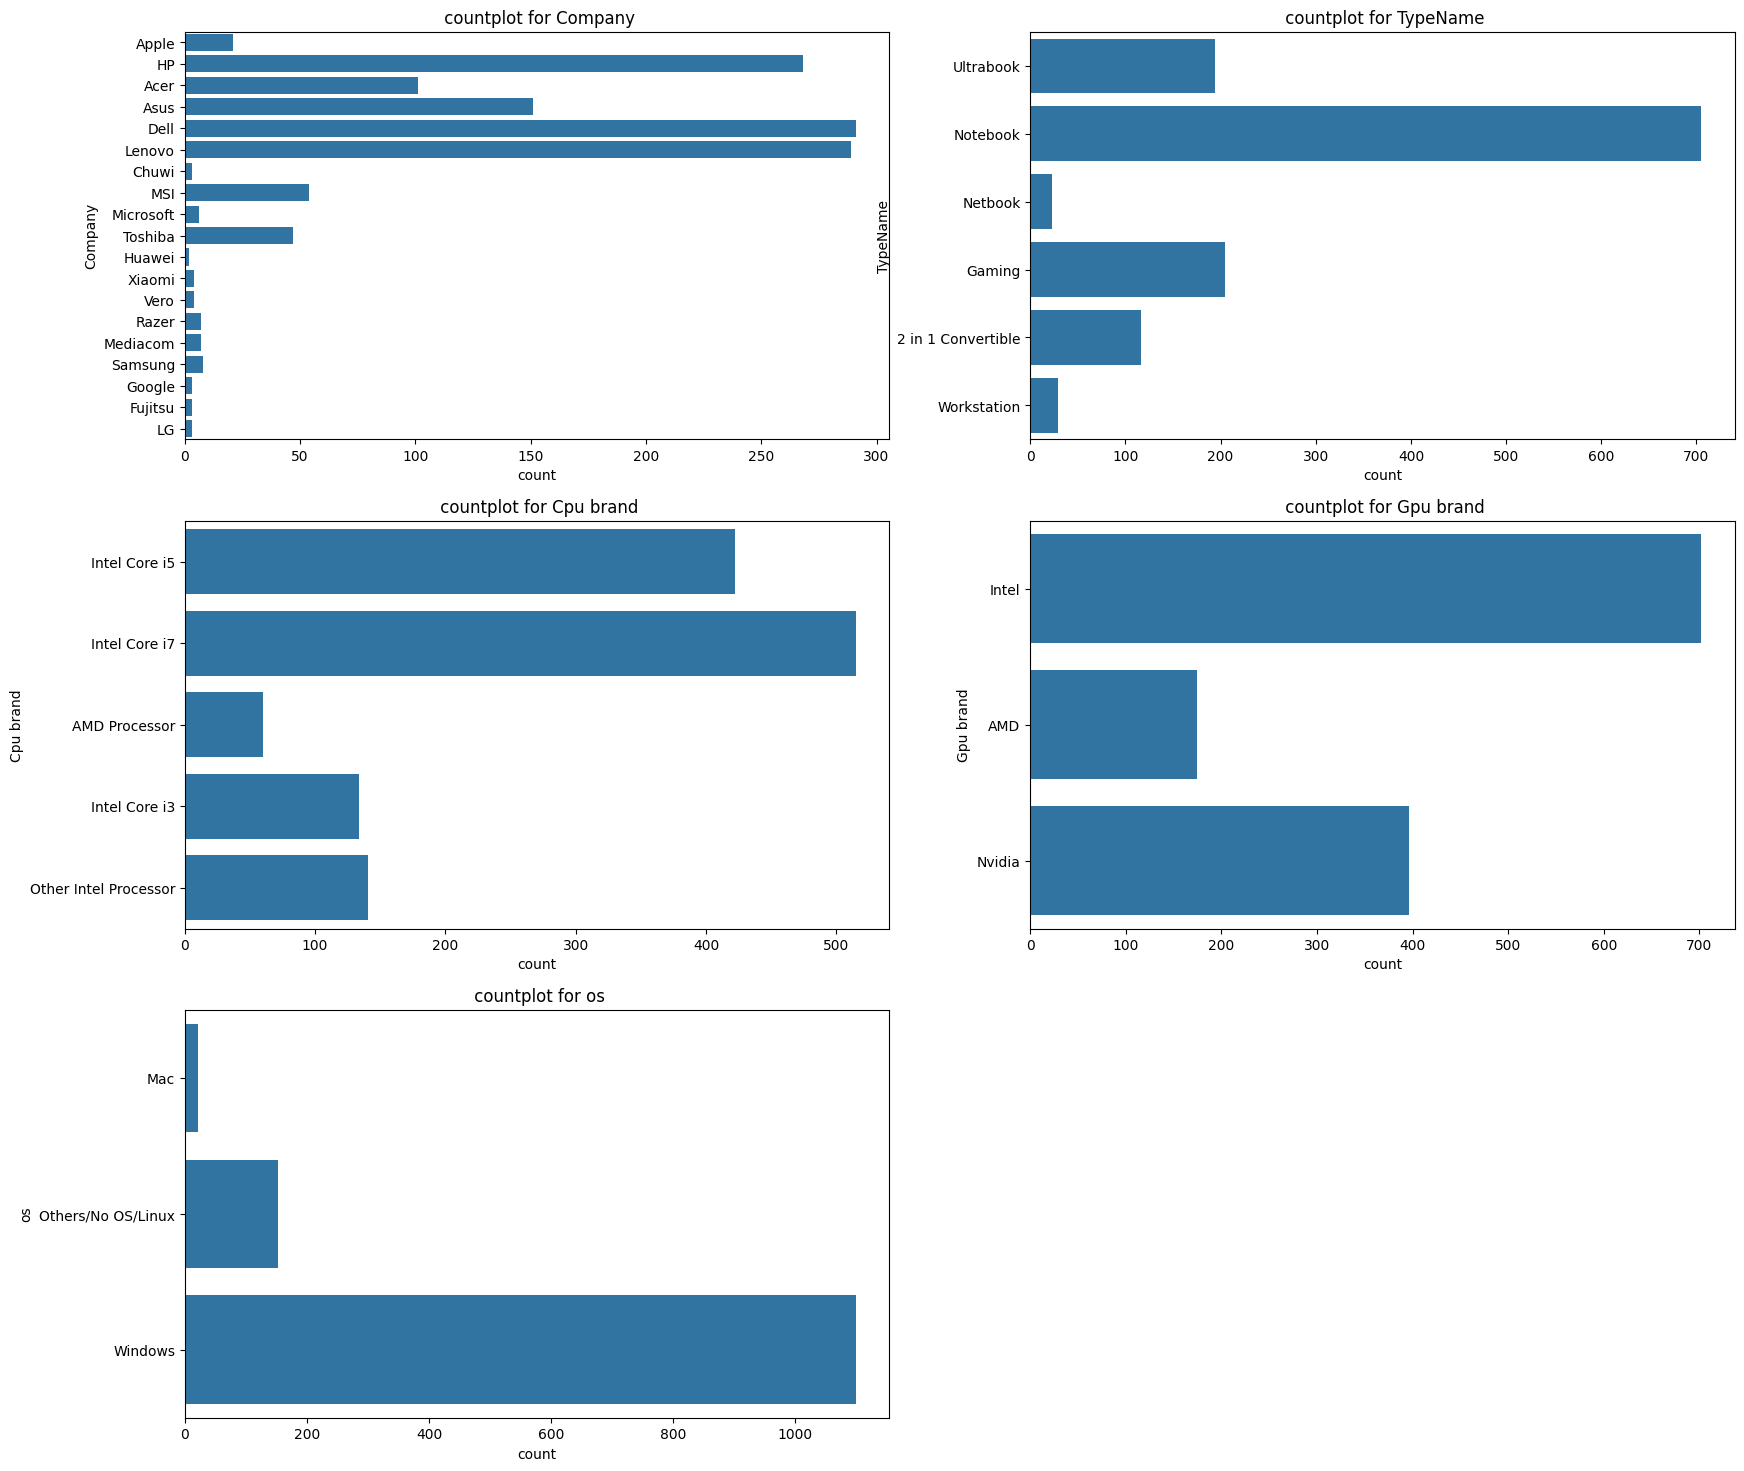

In [12]:
plt.figure(figsize=(20,18))
for i in range(len(cat_col)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat_col[i]])
    plt.title(f' countplot for {cat_col[i]}')
plt.show()

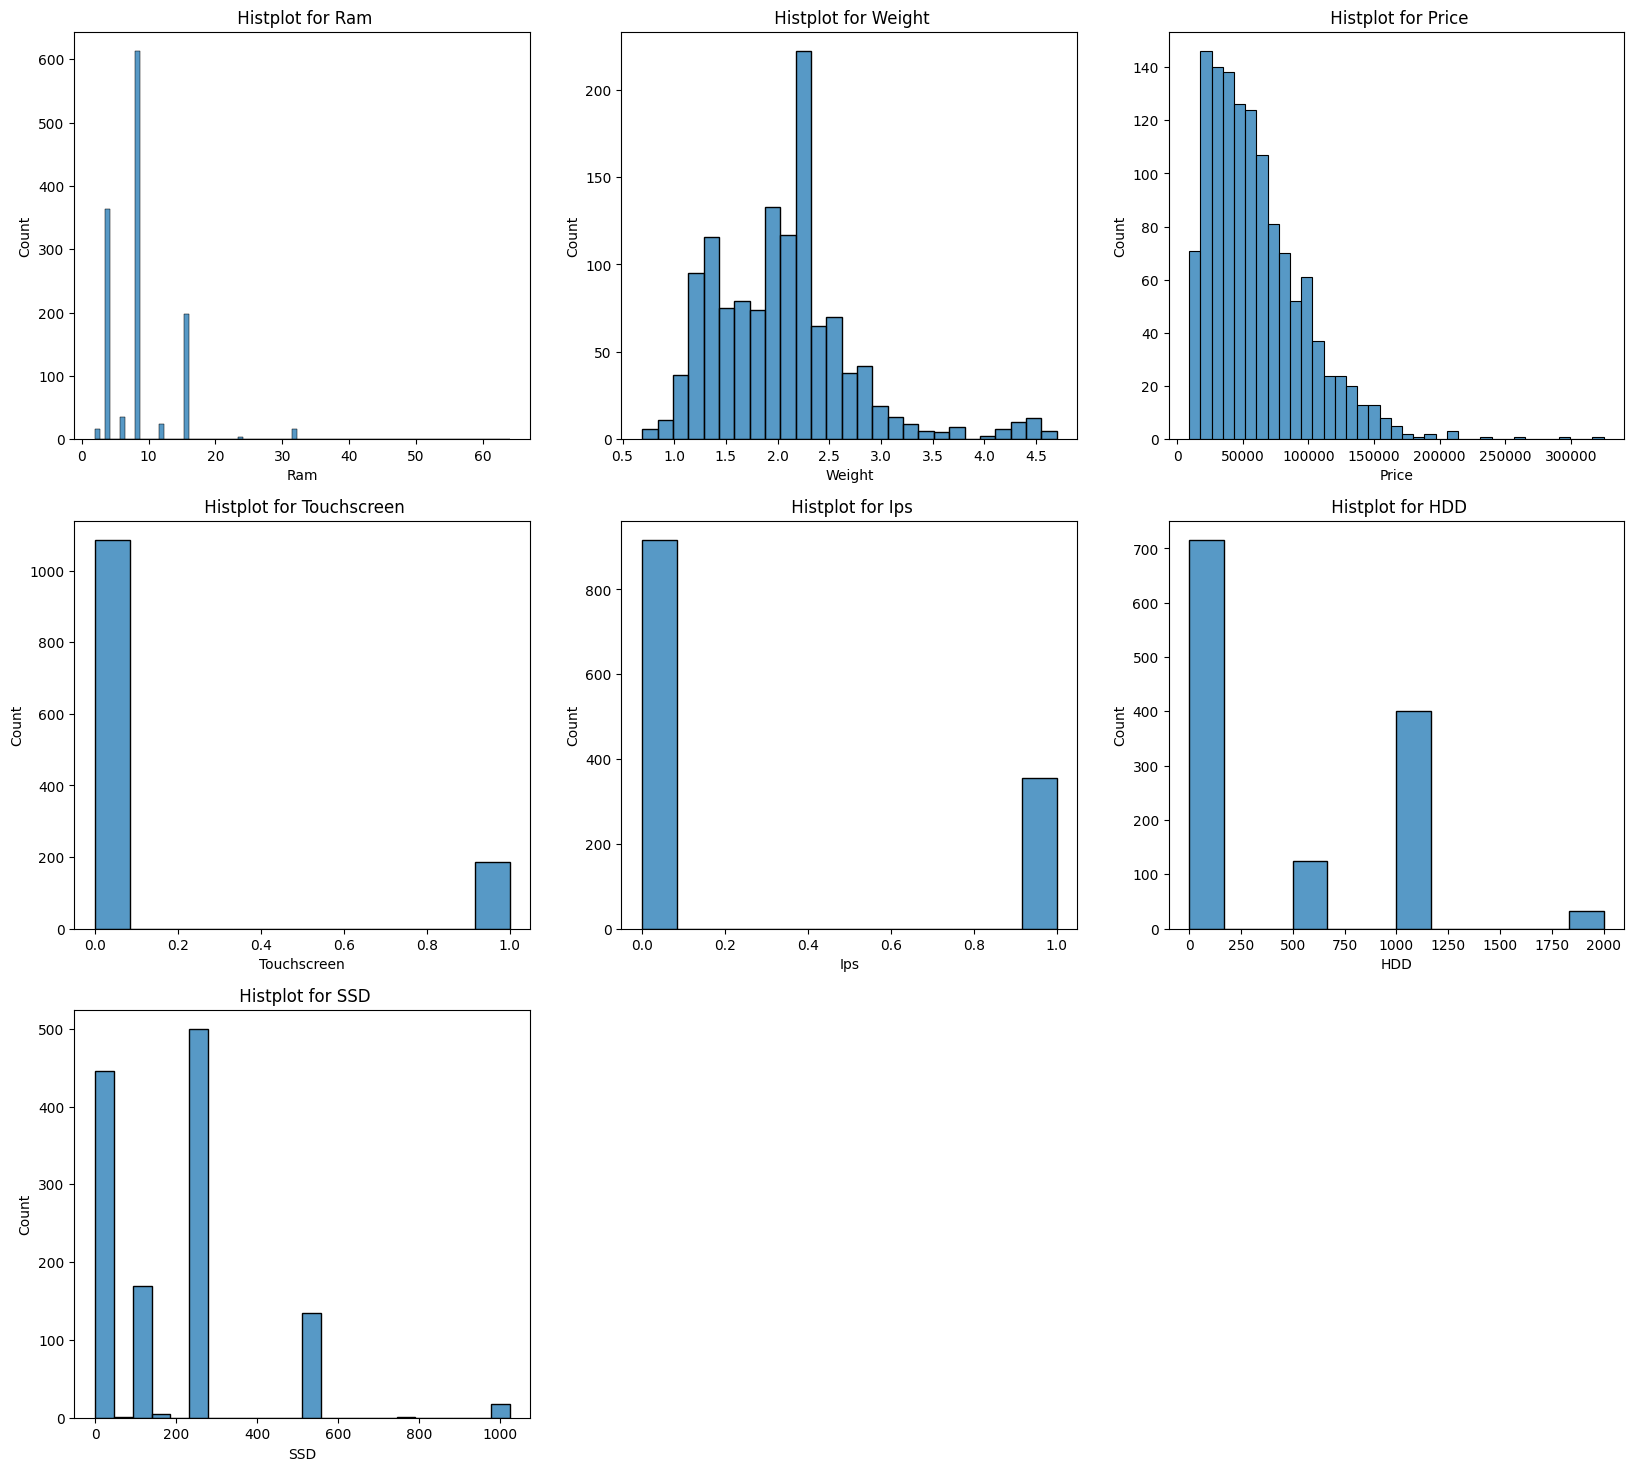

In [13]:
plt.figure(figsize=(20,18))
for i in range(len(Num_col)):
    plt.subplot(3,3,i+1)
    sns.histplot(x=df[Num_col[i]])
    plt.title(f' Histplot for {Num_col[i]}')
plt.show()

# correlation between the numerical features

In [13]:
corr=df[Num_col].corr()
corr

,Ram,Weight,Price,Touchscreen,Ips,HDD,SSD
Ram,1.000000,0.388629,0.740277,0.113073,0.202473,0.096845,0.599540
Weight,0.388629,1.000000,0.211883,-0.292900,0.023368,0.510531,-0.057331
Price,0.740277,0.211883,1.000000,0.190423,0.251594,-0.098453,0.669856
Touchscreen,0.113073,-0.292900,0.190423,1.000000,0.136800,-0.205431,0.252067
Ips,0.202473,0.023368,0.251594,0.136800,1.000000,-0.090839,0.215085
HDD,0.096845,0.510531,-0.098453,-0.205431,-0.090839,1.000000,-0.400937
SSD,0.599540,-0.057331,0.669856,0.252067,0.215085,-0.400937,1.000000


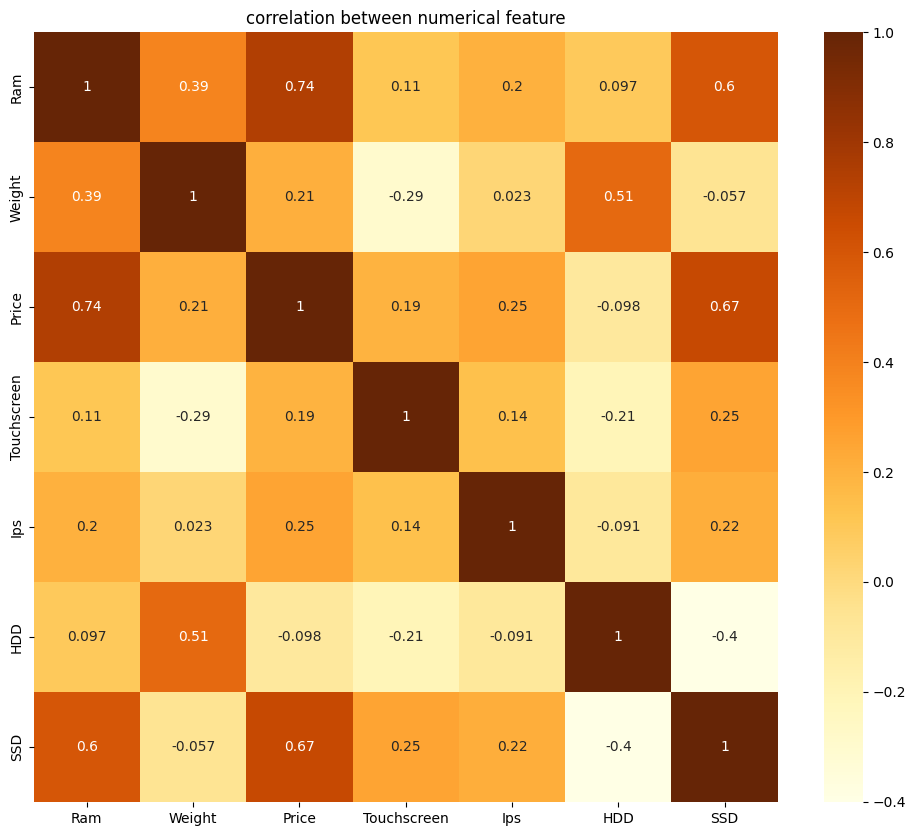

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(data=corr,annot=True,cmap="YlOrBr")
plt.title('correlation between numerical feature')
plt.show()

# outliers treatment

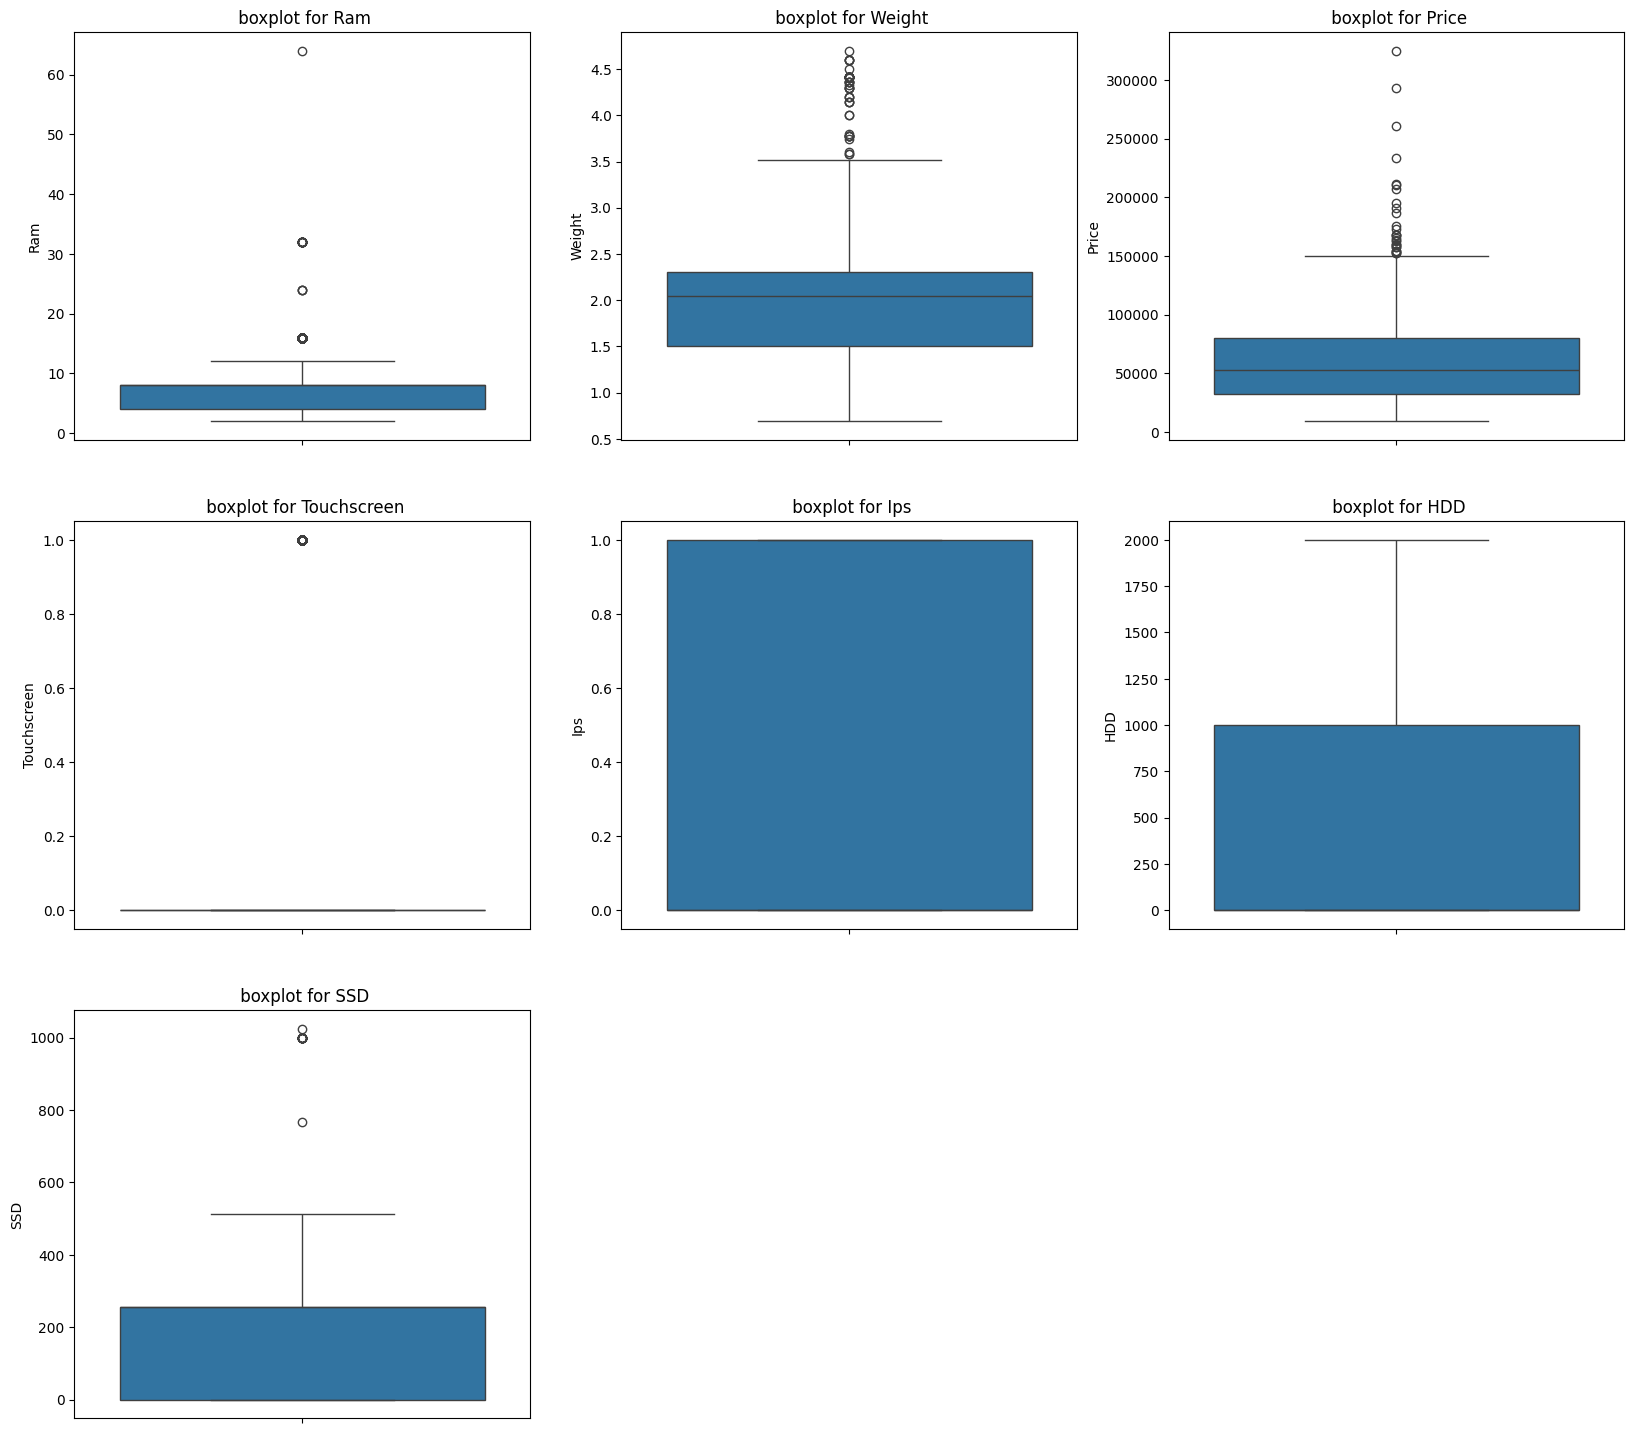

In [14]:
plt.figure(figsize=(20,18))
for i in range (len(Num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(y=df[Num_col[i]])
    plt.title(f' boxplot for {Num_col[i]}')
plt.show()

In [15]:
col=['Ram','Weight','Price','SSD']

a=df[col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Ram,1272.0,8.451258,5.099249,2.00,8.00,16.00,16.000,16.0000,16.000000,32.000,64.00
Weight,1272.0,2.041761,0.669088,0.69,2.04,3.20,3.358,3.7800,4.300000,4.420,4.70
Price,1272.0,60520.657755,37355.685811,9270.72,52693.92,130482.72,136599.264,145283.3712,153350.208288,167855.976,324954.72
SSD,1272.0,186.298742,186.597777,0.00,256.00,512.00,512.000,512.0000,512.000000,1000.000,1024.00


In [16]:
print(df[df['Ram']>16.00].shape)
print(df[df['Weight']>3.7800].shape)
print(df[df['Price']>153350.208288].shape)
print(df[df['SSD']>512.000000].shape)

(21, 12)
(36, 12)
(26, 12)
(18, 12)


In [17]:
df1=df.copy()

In [18]:
df['Ram']=np.where(df['Ram']>16.00,16.00,df['Ram'])
df['Weight']=np.where(df['Weight']>4.300000,4.300000,df['Weight'])
df['Price']=np.where(df['Price']>153350.208288,153350.208288,df['Price'])
df['SSD']=np.where(df['SSD']>512.000000,512.000000,df['SSD'])

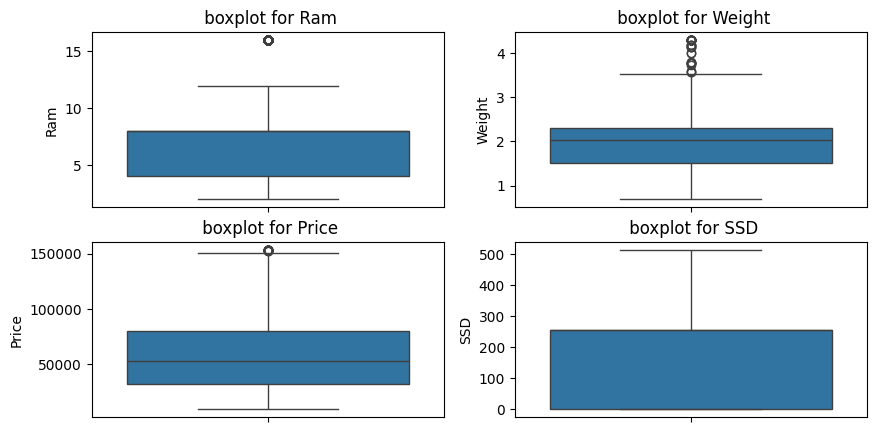

In [89]:
plt.figure(figsize=(10,5))
for i in range(len(col)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=df[col[i]])
    plt.title(f' boxplot for {col[i]}')
plt.show()

In [19]:
for i in cat_col:
    print(f'features {i}')
    print(df[i].value_counts())
    print('*'*30)

features Company
Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       47
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64
******************************
features TypeName
TypeName
Notebook              705
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64
******************************
features Cpu brand
Cpu brand
Intel Core i7            515
Intel Core i5            422
Other Intel Processor    141
Intel Core i3            134
AMD Processor             60
Name: count, dtype: int64
******************************
features Gpu brand
Gpu brand
Intel     702
Nvidia    396
AMD       174
Name: count, dtype: int64
***************************

In [21]:
df['Company']=df['Company'].replace({'Razer':'others','Mediacom':'others','Microsoft':'others','Xiaomi':'others',
                                       'Vero':'others','Chuwi':'others','Google':'others','Fujitsu':'others','LG':'others','Huawei':'others'})
#Dell         291         
#Lenovo       289
#HP           268
#Asus         151
#Acer         101
#MSI           54
#Toshiba       47
#Apple         21
#Samsung        8     

In [ ]:
#Razer          7
#Mediacom       7
#Microsoft      6
#Xiaomi         4
#Vero           4
#Chuwi          3
#Google         3
#Fujitsu        3
#LG             3
#Huawei         2

In [22]:
df['Company'].value_counts()

Company
Dell       291
Lenovo     289
HP         268
Asus       151
Acer       101
MSI         54
Toshiba     47
others      42
Apple       21
Samsung      8
Name: count, dtype: int64

# Encode categorical features

In [23]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for i in (cat_col):
    df[i]=lb.fit_transform(df[i])

In [58]:
df.dtypes

Company          int64
TypeName         int64
Ram            float64
Weight         float64
Price          float64
Touchscreen      int64
Ips              int64
Cpu brand        int64
HDD              int64
SSD            float64
Gpu brand        int64
os               int64
dtype: object

In [24]:
df.head(10)

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,Cpu brand,HDD,SSD,Gpu brand,os
0,1,4,8.0,1.37,71378.6832,0,1,2,0,128.0,1,0
1,1,4,8.0,1.34,47895.5232,0,0,2,0,0.0,1,0
2,4,3,8.0,1.86,30636.0000,0,0,2,0,256.0,1,1
3,1,4,16.0,1.83,135195.3360,0,1,3,0,512.0,0,0
4,1,4,8.0,1.37,96095.8080,0,1,2,0,256.0,1,0
5,0,3,4.0,2.10,21312.0000,0,0,0,500,0.0,0,2
6,1,4,16.0,2.04,114017.6016,0,1,3,0,0.0,1,0
7,1,4,8.0,1.34,61735.5360,0,0,2,0,0.0,1,0
8,2,4,16.0,1.30,79653.6000,0,0,3,0,512.0,2,2
9,0,4,8.0,1.60,41025.6000,0,1,2,0,256.0,1,2


# select independent and dependent value

In [25]:
x=df.drop('Price',axis=1)
y=df['Price']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(1272, 11)
(1272,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# split the data into training and testing data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(890, 11)
(382, 11)
(890,)
(382,)


In [61]:
print(0.3*1272)

381.59999999999997


# Function to evaluate model performance

In [37]:
from sklearn.metrics import *

In [44]:
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    test_mse =mean_squared_error(y_test,ypred)
    test_rmse=np.sqrt(test_mse)
    test_mae=mean_absolute_error(y_test,ypred)
    res=pd.DataFrame({'Training_score':train_score,'Testing_score':test_score,'Test_mse': test_mse,'Test_rmse': test_rmse,
                        'Test_mae': test_mae},index=[mname])
    return res,ypred

# Load ml model

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# Linear Reg

In [45]:
lr1=LinearRegression()
lr1_res,ypred_lr1=eval_model(lr1,x_train,x_test,y_train,y_test,'Linear_Reg')
lr1_res

,Training_score,Testing_score,Test_mse,Test_rmse,Test_mae
Linear_Reg,0.659127,0.657925,4.202822e+08,20500.786205,15977.226911


# DT reg

In [47]:
dt1=DecisionTreeRegressor(max_depth=8,min_samples_split=10)
dt1_res,ypred_dt1=eval_model(dt1,x_train,x_test,y_train,y_test,'DT_Reg')
dt1_res

,Training_score,Testing_score,Test_mse,Test_rmse,Test_mae
DT_Reg,0.851763,0.70088,3.675065e+08,19170.458924,12372.006387


# RandomFor Reg

In [51]:
rf1=RandomForestRegressor(n_estimators=200,max_depth=8,min_samples_split=10)
rf1_res,ypred_rf1=eval_model(rf1,x_train,x_test,y_train,y_test,'RF_reg')
rf1_res

,Training_score,Testing_score,Test_mse,Test_rmse,Test_mae
RF_reg,0.876983,0.758074,2.972364e+08,17240.545988,11685.382223


# AdaBoost Reg

In [54]:
ad1=AdaBoostRegressor(estimator=dt1,n_estimators=200)
ad1_res,ypred_rf1=eval_model(ad1,x_train,x_test,y_train,y_test,'AdaBoost_reg')
ad1_res

,Training_score,Testing_score,Test_mse,Test_rmse,Test_mae
AdaBoost_reg,0.891232,0.753258,3.031535e+08,17411.302897,13364.642154


# Inference

#### The best model is RandomForestRegressor

# save the model

In [55]:
import pickle

In [57]:
pickle.dump(lr1,open('lr1_model_laptop_pred.pkl','wb'))
pickle.dump(dt1,open('dt1_model_laptop_pred.pkl','wb'))
pickle.dump(rf1,open('rf1_model_laptop_pred.pkl','wb'))
pickle.dump(ad1,open('ad1_model_laptop_pred.pkl','wb'))